#Finished Code and Visualizations

In [43]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
from IPython.html.widgets import fixed
import IPython as ipynb
%matplotlib inline

We begin with the base class that does all the work:

```python
class Network:
    def __init__(self, shape):
        """The base network class. This defines a simple feed-forward network with appropriate weights and biases.
        
        Arguments:
        shape (list-like): This defines the # of layers and # of neurons per layer in your network.
                           Each element of the array or list adds a new layer with the number neurons specified by the element.
        Variables:
        self.shape: see shape.
        self.weights: A list of numpy arrays containing the weights corresponding to each channel between neurons.
        self.biases: A list of numpy arrays containing the biases corresponding to each neuron.
        self.errors: A list of numpy arrays containing the error of each neurons in any iteration of the training process.
        self.eta: A float representing the learning rate.
        self.lam: A scale factor used in L2 regularization
        """
        
        self.shape = np.array(shape)
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .2
        self.lam = .01
    def sigmoid(self, inputs):
        """Computes the sigmoid function of some input.
        
        Arguments:
        inputs (float or numpy array): The input or inputs to be fed through the sigmoid function.
        """
        
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        """Feeds inputs through the network and returns the output.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        
        Variables:
        self.activation: A list of numpy arrays corresponding to the output of each neuron in your network.
        """
        
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def comp_error(self, answer):
        """Computes the errors of each neuron.(Typically called Back Propagation)
        
        Arguments:
        answers (numpy array): The expected output from the network, must be the same size as the last(output) layer.
        """
        
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = (self.activation[-1]-answer)*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        """Changes each variable based on the gradient descent algorithm."""
        
        for i in range(len(self.biases)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = (1-self.eta*self.lam/1000)*self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        """Trains the network.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        answers (numpy array): The expected output from the network, must be the same size as the last(output) layer.
        """
        
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()
```

 Once I got the base class working, it was time to play.
 
 What I have so far is the following.

In [50]:
acc1 = np.loadtxt("Accuracy_Data_run_1.dat")
acc2 = np.loadtxt("Accuracy_Data_run_2.dat")
acc3 = np.loadtxt("Accuracy_Data_run_3.dat")
acc4 = np.loadtxt("Accuracy_Data_run_4.dat")
acc5 = np.loadtxt("Accuracy_Data_run_5.dat")
acc7 = np.loadtxt("Accuracy_Data_run_7_a.dat")
print acc2.shape
def plot_epochs(az_angle, eleva, acc):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,acc.shape[1],acc.shape[1]), np.linspace(14-acc.shape[0],14, acc.shape[0]))
    ax.plot_surface(X, Y, acc)
    plt.xlabel("Training Epoch")
    plt.ylabel("# of Hidden Layers")
    ax.set_zlabel("Accuracy")
    plt.title("Accuracy as a Function of # of Hidden Layers and Training Epochs")
    ax.view_init(elev=eleva, azim=az_angle);

(7, 500)


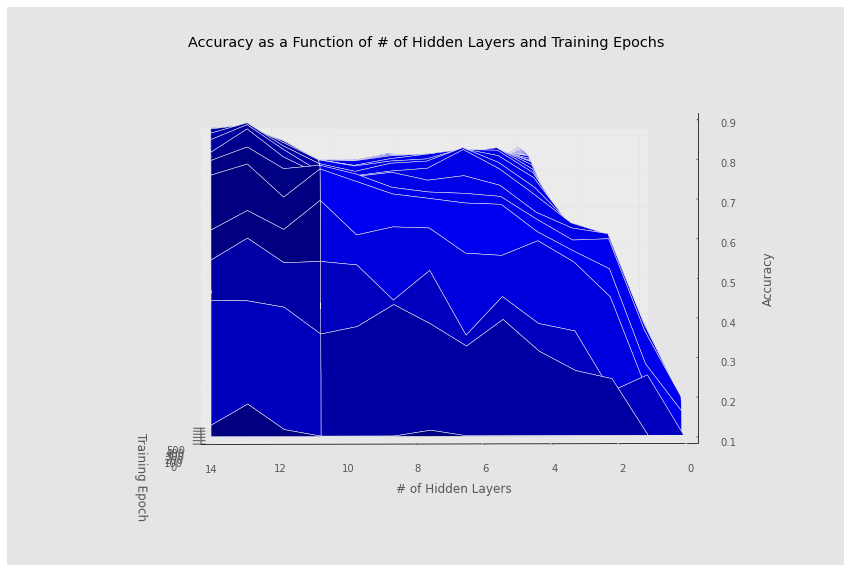

In [52]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc1));

This is a graph of accuracy as a function of # of hidden layers and training epochs before I added L2 regularization. This is with 1000 training samples per epoch. 

###Key Features:
-Every run except those with less than 3 hidden layers quickly jumps to anywhere between 70% and 90% accuracy within about 100 training epochs.

-Directly following around the 150 epoch mark, accuracy begins to decline.

-From 4 to 14 hidden layers we see an upward trend in accuracy.

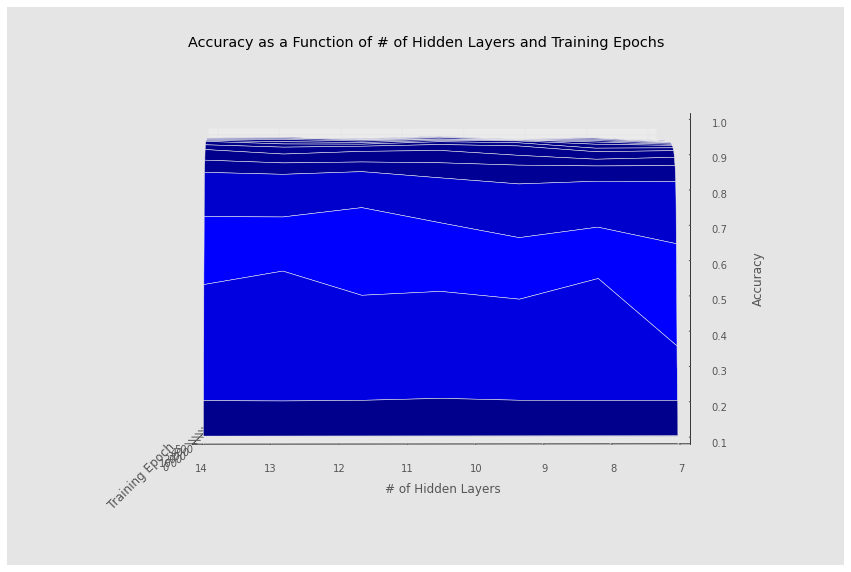

In [53]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc2));

This is a graph of accuracy as a function of # of hidden layers and training epochs after I added L2 regularization. This is with 1000 training samples per epoch. 

###Key Features:
-Every run quickly jumps to above 90% accuracy within about 100 training epochs.

-Directly following around the 150 epoch mark, accuracy no longer begins to decline. This is the L2 in action!

-If you look very closely or plot only the values above 90% accuracy, there is still a slight trend upward from 7 to 14 hidden layers.

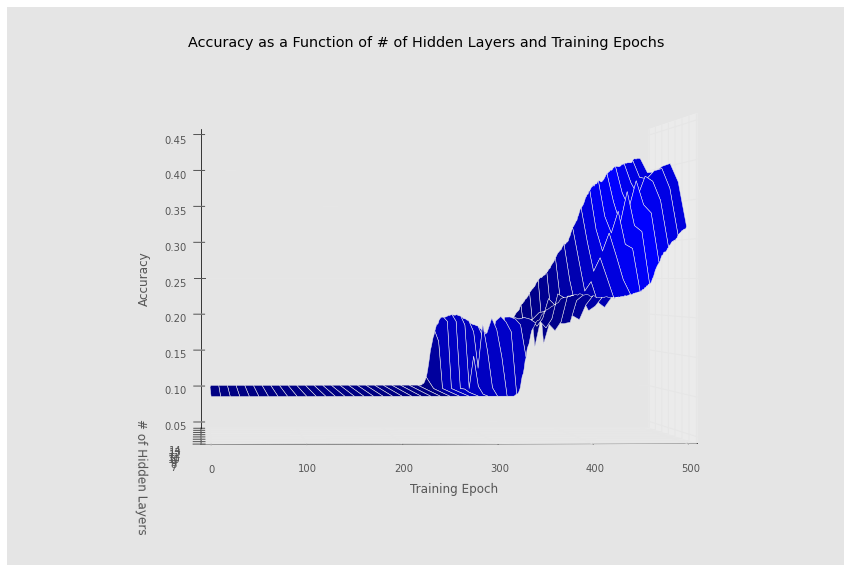

In [54]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc3));

This is a graph of accuracy as a function of # of hidden layers and training epochs after I added L2 regularization. This is with 50 training samples per epoch. 

###Key Features:
-Every run stays at around 10% accuracy(random guesses) until about 270 epochs.

-At about the 270 mark, the runs with a higher # of hidden layers lead the pack with increasing accuracy. The others follow in a similar fashion.

-None of the runs make it past 45% accuracy in 500 epochs.

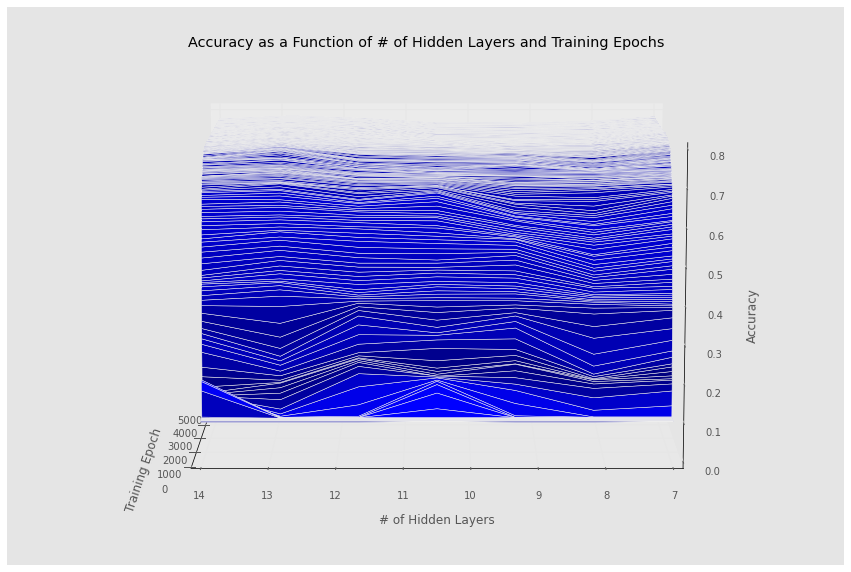

In [48]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc4));

This is a graph of accuracy as a function of # of hidden layers and training epochs after I added L2 regularization. This is with 50 training samples per epoch. 

###Key Features:
-From 0 to 500, the graph exactly replicates the previous one.

-It takes around 1000 training epochs to reach maximum accuracy.

-None of the runs make it past 80% accuracy.

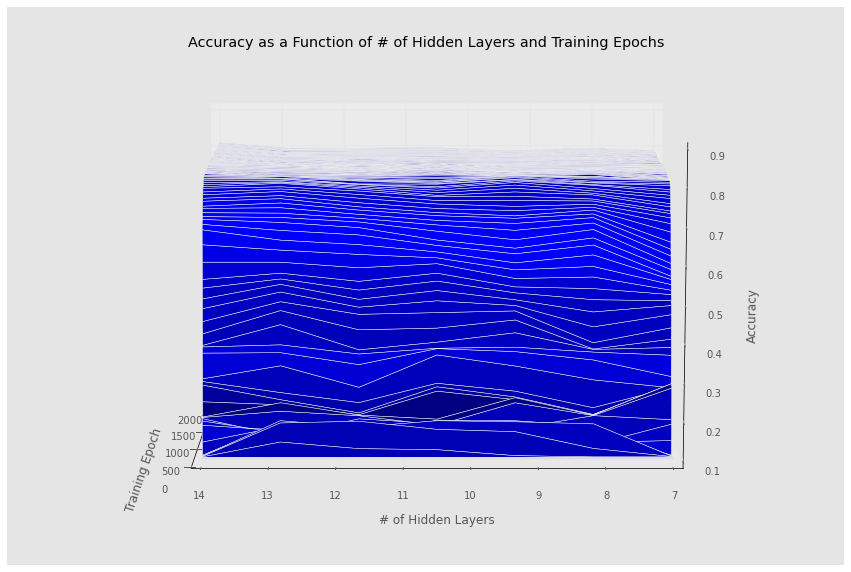

In [49]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc5));

This is a graph of accuracy as a function of # of hidden layers and training epochs after I added L2 regularization. This is with 100 training samples per epoch. 

###Key Features:
-At around 500 epochs every run reaches a max accuracy.

-From 7 to 14 hidden layers we see a rise from just below 80% to just above 80%.

-None of the runs make it past 82% accuracy.

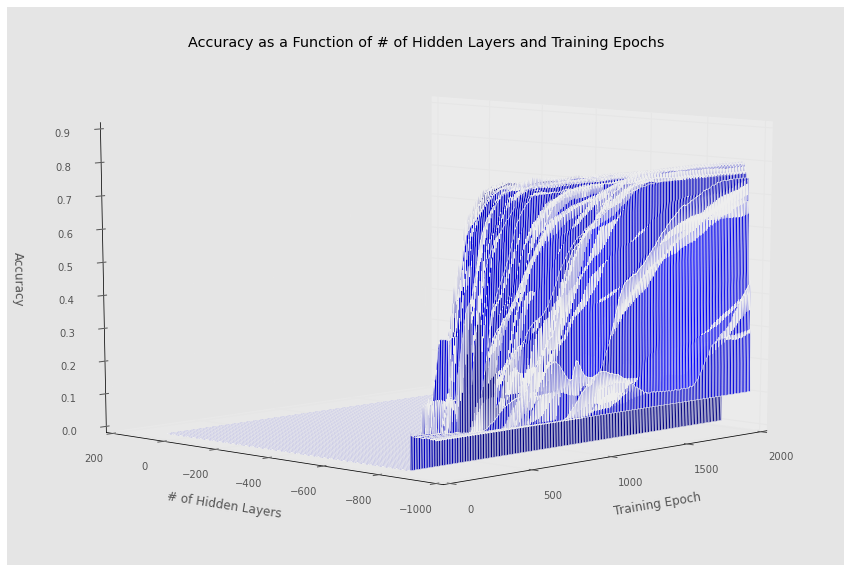

In [51]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1), acc=fixed(acc7));

##Next Steps

### # of Training Samples vs. Max Accuracy
This will be an interesting graph because if you have to show the network everything, it is useless. I seek a compromise between accuracy and how many samples I have to disclose. Also from this graph I will get # of training samples vs. # of epochs. Extrapolating from the above graphs, it appears to have an inverse relationship. That would be cool to quantify as well.

### Optimizing the algorithms
I want to look into two routes of optimization. First, swarm-based weight initialization wherein weights are initialized based on initializing a bunch of networks, feeding them forward once and finding the least cost function. Upon finding it, all other weights are chucked and business proceeds as normal. Second, I want to explore using differential evolution from the scipy optimize package to find global minima rather than local minima with gradient descent.

### Looking for more efficient cost functions
Another method to increase the speed of training would be to find a more efficient cost function...whatever that means.